#  Putting Multitask Learning to Work

This notebook walks through the creation of multitask models on MUV [1]. The goal is to demonstrate how multitask methods can provide improved performance in situations with little or very unbalanced data.

##  What are Multitask Classifiers

A multitask classifier is a machine learning model that is trained to perform multiple classification tasks simultaneously. It's like predicting multitple tasks or outputs from same input data. It offers data efficiency, faster model convergence and reduced model overfitting due to shared representations. It can predict various aspects such as compound activity, toxicity, drug-target interactions and more.


## Colab

This tutorial and the rest in this sequence are designed to be done in Google colab. If you'd like to open this notebook in colab, you can use the following link.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/Putting_Multitask_Learning_to_Work.ipynb)



In [ ]:
!pip install --pre deepchem
import deepchem
deepchem.__version__

The MUV dataset is a challenging benchmark in molecular design that consists of 17 different "targets" where there are only a few "active" compounds per target. There are 93,087 compounds in total, yet no task has more than 30 active compounds, and many have even less. Training a model with such a small number of positive examples is very challenging.  Multitask models address this by training a single model that predicts all the different targets at once. If a feature is useful for predicting one task, it often is useful for predicting several other tasks as well. Each added task makes it easier to learn important features, which improves performance on other tasks [2].

To get started, let's load the MUV dataset.  The MoleculeNet loader function automatically splits it into training, validation, and test sets.  Because there are so few positive examples, we use stratified splitting to ensure the test set has enough of them to evaluate.

In [1]:
import deepchem as dc
import numpy as np

tasks, datasets, transformers = dc.molnet.load_muv(splitter='stratified')
train_dataset, valid_dataset, test_dataset = datasets

Now let's train a model on it.  We'll use a MultitaskClassifier, which is a simple stack of fully connected layers.

In [2]:
n_tasks = len(tasks)
n_features = train_dataset.get_data_shape()[0]
model = dc.models.MultitaskClassifier(n_tasks, n_features)
model.fit(train_dataset)

0.0004961589723825455

Let's see how well it does on the test set.  We loop over the 17 tasks and compute the ROC AUC for each one.

In [3]:
y_true = test_dataset.y
y_pred = model.predict(test_dataset)
metric = dc.metrics.roc_auc_score
for i in range(n_tasks):
    score = metric(dc.metrics.to_one_hot(y_true[:,i]), y_pred[:,i])
    print(tasks[i], score)

MUV-466 0.9207684040838259
MUV-548 0.7480655561526062
MUV-600 0.9927995701235895
MUV-644 0.9974207415368082
MUV-652 0.7823481998925309
MUV-689 0.6636843990686011
MUV-692 0.6319093677234462
MUV-712 0.7787838079885365
MUV-713 0.7910711087229088
MUV-733 0.4401307540748701
MUV-737 0.34679383843811573
MUV-810 0.9564571019165323
MUV-832 0.9991044241447251
MUV-846 0.7519881783987103
MUV-852 0.8516747268493642
MUV-858 0.5906591438294824
MUV-859 0.5962954008166774


Not bad!  Recall that random guessing would produce a ROC AUC score of 0.5, and a perfect predictor would score 1.0.  Most of the tasks did much better than random guessing, and many of them are above 0.9.

## A Quick Understanding of ROC - AUC Curves

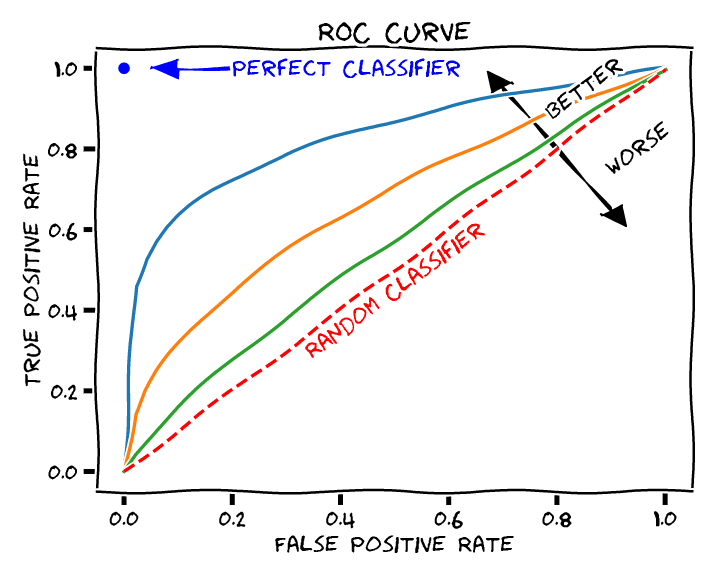

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Gitter
The DeepChem [Gitter](https://gitter.im/deepchem/Lobby) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!

# Bibliography

[1] https://pubs.acs.org/doi/10.1021/ci8002649

[2] https://pubs.acs.org/doi/abs/10.1021/acs.jcim.7b00146